This is our first Notebook and our aim is to explore different machine learning classification models, get the accuracy of various models and choose the most appropriate machine learning model for building future websites. We will give one of the 16 results directly, rather than splitting them into four categories for analysis.

The running platform is google colab

##Importing libraries

We are using google colab to complete this Notebook, so we need the following code to link to Google Drive to use the dataset

In [ ]:
# Import data, data was stored in "/content/drive/My Drive/Colab Notebooks/Dataset", name as "./DataBase_MBTI"
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/Colab Notebooks/Dataset
!ls

Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks/Dataset
box_wordcount.png	   DataBase_MBTI.csv	 personality_data.csv.csv
catboost_info		   Datasetfinal.csv	 preprocess.p
clean_data_1.csv	   df_holdout.csv.csv	 tfidf_vectorized_data.csv
clean_data_2.csv	   final_model.h5	 tokenizer.pickle
clean_data_3.csv	   mbti_1.csv
count_vectorized_data.csv  personality_data.csv


In [ ]:
!pip install catboost
!pip install -U scikit-learn
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 9.8 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 19.2 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.1
    Uninstalling scikit-learn-1.2.1:
      Successfully uninstalled scikit-learn-1.2.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


These are three Python commands in which the pip package manager is used to install three Python libraries. Specifically, they install the following three libraries:

catboost: a machine learning library for gradient boosting on decision trees, which can be used for tasks such as classification, regression, and ranking.

scikit-learn: a popular machine learning library in Python, which provides a variety of classification, regression, and clustering algorithms.

tensorflow: an open-source library for artificial intelligence and deep learning, which provides various tools and APIs for building and training neural networks.

These are the libraries that need to be used

In [ ]:
import pandas as pd
from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from wordcloud import WordCloud
import numpy as np
from tqdm import tqdm
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC,LinearSVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from imblearn.over_sampling import SMOTE
import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from collections import defaultdict
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import TreebankWordTokenizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib
from imblearn.over_sampling import SMOTE
import matplotlib.patches as mpatches
import string
import re
import os
%matplotlib inline 

nltk.download('wordnet')
nltk.download('omw-1.4')

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.9/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
def get_top_text_ngrams(corpus, ngrams=(1, 1), nr=None):
    """
    Creates a bag of ngrams and counts ngram frequency.
    
    Returns a sorted list of tuples: (ngram, count)
    """
    vec = CountVectorizer(ngram_range=ngrams).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:nr]


def generate_ngrams(text, n_gram=1, stop=True):
    """
    Simple n-gram generator.
    """
    stop = set(stopwords.words("english")) if stop else {}

    token = [
        token for token in text.lower().split(" ") if token != "" if token not in stop
    ]
    z = zip(*[token[i:] for i in range(n_gram)])
    ngrams = [" ".join(ngram) for ngram in z]

    return ngrams
def create_corpus(df, target):
    """
    Create corpus based on the target.
    """
    corpus = []

    for x in df[df["type"] == target].posts.str.split():
        for i in x:
            corpus.append(i)
    return corpus

This is a block of Python code that defines three functions for text analysis:

get_top_text_ngrams(corpus, ngrams=(1, 1), nr=None): This function takes in a list of text documents corpus and returns a sorted list of tuples containing the n-grams and their frequency counts. The ngrams argument specifies the range of n-grams to consider (defaulting to unigrams). The nr argument can be used to limit the number of results returned.

generate_ngrams(text, n_gram=1, stop=True): This function takes in a single text document text and generates a list of n-grams of length n_gram. The stop argument is a boolean flag that indicates whether stop words should be removed (defaulting to True).

create_corpus(df, target): This function takes in a Pandas DataFrame df and a target value target, and returns a list of words extracted from the posts column of the DataFrame where the type column matches the target value.

##Concatenate datasets

In [ ]:
data=pd.read_csv("./DataBase_MBTI.csv")
data.head()  # read first 5 examples  

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


##Data cleaning and preprocessing

In [ ]:
# Stratify split to ensure equal distribution of data

train_data,test_data=train_test_split(data,test_size=0.2,random_state=42,stratify=data.type)

In [ ]:
import nltk
nltk.download('stopwords')

stop = set(stopwords.words("english"))
stemmer = PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


This is a block of Python code that uses the Natural Language Toolkit (nltk) library to download the English stopwords dataset. Stopwords are common words such as "the", "a", and "is" that are often removed from text data during analysis.

The second part of the code initializes a set of stopwords using the stopwords.words("english") function call, which returns a list of English stopwords. These stopwords are saved in a Python set for faster lookup during analysis.

The last line of the code initializes a Porter stemmer from the nltk.stem module. Stemming is the process of reducing a word to its root or base form, which can help to reduce the dimensionality of the feature space during text analysis. The Porter stemmer is a widely-used algorithm for stemming English words.

In [ ]:
def clear_text(data):
    data_length=[]
    lemmatizer=WordNetLemmatizer()
    cleaned_text=[]
    data = data.drop_duplicates()
    
    for sentence in tqdm(data.posts):
        sentence=sentence.lower()

        # removing links from text data
        sentence=re.sub('https?://[^\s<>"]+|www\.[^\s<>"]+',' ',sentence)

        # removing other symbols
        sentence=re.sub('[^0-9a-z]',' ',sentence)

        # Keep the End Of Sentence characters
        sentence = re.sub(r'\.', ' EOSTokenDot ', sentence + " ")
        sentence = re.sub(r'\?', ' EOSTokenQuest ', sentence + " ")
        sentence = re.sub(r'!', ' EOSTokenExs ', sentence + " ")

        # Strip Punctation
        sentence = re.sub(r'\.+', ".", sentence)

        # Remove multiple fullstops
        sentence = re.sub(r'\.{2,}', '.', sentence)

        # Remove Non-words
        sentence = re.sub(r'[^a-zA-Z\s]', '', sentence)

        # Convert posts to lowercase
        sentence = sentence.lower()

        # Remove multiple letter repeating words
        sentence = re.sub(r'([a-z])\1{2,}[\s|\w]*', '', sentence)

        # Remove MBTI Personality Words - crutial in order to get valid model accuracy estimation for unseen data.
        replace_list = [('INFP', ''), ('INTP', ''), ('INTJ', ''), ('ENTP', ''), ('ENFP', ''), ('ISTP', ''), ('ISFP', ''), ('ENTJ', ''), ('ISTJ', ''), ('ENFJ', ''), ('ISFJ', ''), ('ESTP', ''), ('ESFP', ''), ('ESFJ', ''), ('ESTJ', '')]

        for original, replacement in replace_list:
            sentence = re.sub(original, replacement, sentence)

        # Remove very short or long words
        sentence = re.sub(r'\b\w{0,3}\b', '', sentence)
        sentence = re.sub(r'\b\w{30,1000}\b', '', sentence)

        data_length.append(len(sentence.split()))
        cleaned_text.append(sentence)
    return cleaned_text,data_length


This is a block of Python code that defines a function called clear_text(data). This function takes in a Pandas DataFrame data, cleans the text data in the posts column, and returns the cleaned text as a list, along with a list of the number of words in each sentence.

The cleaning process includes the following steps:

Converting all text to lowercase

Removing links from the text data

Removing non-alphanumeric characters

Keeping end-of-sentence markers and replacing them with unique tokens

Stripping punctuation

Removing multiple fullstops

Removing non-words

Removing repeated letters within words

Removing MBTI personality type labels (e.g. INFP, ENFJ) to improve accuracy on unseen data

Removing very short or very long words

The function also uses the WordNetLemmatizer from the nltk library to lemmatize words, which means reducing words to their base form. The function also removes duplicate sentences in the input data.

Finally, the function returns a tuple containing a list of cleaned sentences and a list of the number of words in each sentence.

In [ ]:
train_data.posts,train_length=clear_text(train_data)

100%|██████████| 6940/6940 [00:14<00:00, 465.74it/s]


In [ ]:
test_data.posts,test_length=clear_text(test_data)

100%|██████████| 1735/1735 [00:02<00:00, 601.52it/s]


These two lines of Python code call the clear_text function to clean the posts column in the train_data and test_data Pandas DataFrames.

The cleaned text data and corresponding number of words in each sentence are returned by the function as tuples, which are unpacked and assigned to train_data.posts and train_length for the training data, and test_data.posts and test_length for the test data, respectively.

##Exploratory data analysis

In [ ]:
data.type.value_counts()

INFP    1832
INFJ    1470
INTP    1304
INTJ    1091
ENTP     685
ENFP     675
ISTP     337
ISFP     271
ENTJ     231
ISTJ     205
ENFJ     190
ISFJ     166
ESTP      89
ESFP      48
ESFJ      42
ESTJ      39
Name: type, dtype: int64

In [ ]:
#Checking if there are any missing or null values present in the dataset.
data.isnull().any()

type     False
posts    False
dtype: bool

In [ ]:
#The size of the dataset
nRow, nCol = data.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 8675 rows and 2 columns


In [ ]:
#Dataset Information
data.dtypes

type     object
posts    object
dtype: object

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    8675 non-null   object
 1   posts   8675 non-null   object
dtypes: object(2)
memory usage: 135.7+ KB


In [ ]:
data.describe(include=['object'])

,type,posts
count,8675,8675
unique,16,8675
top,INFP,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
freq,1832,1


In [ ]:
types = np.unique(np.array(data['type']))
types

array(['ENFJ', 'ENFP', 'ENTJ', 'ENTP', 'ESFJ', 'ESFP', 'ESTJ', 'ESTP',
       'INFJ', 'INFP', 'INTJ', 'INTP', 'ISFJ', 'ISFP', 'ISTJ', 'ISTP'],
      dtype=object)

In [ ]:
total = data.groupby(['type']).count()
total

,posts
type,
ENFJ,190
ENFP,675
ENTJ,231
ENTP,685
ESFJ,42
ESFP,48
ESTJ,39
ESTP,89
INFJ,1470


Text(0.5, 1.0, 'Total posts for each personality type')

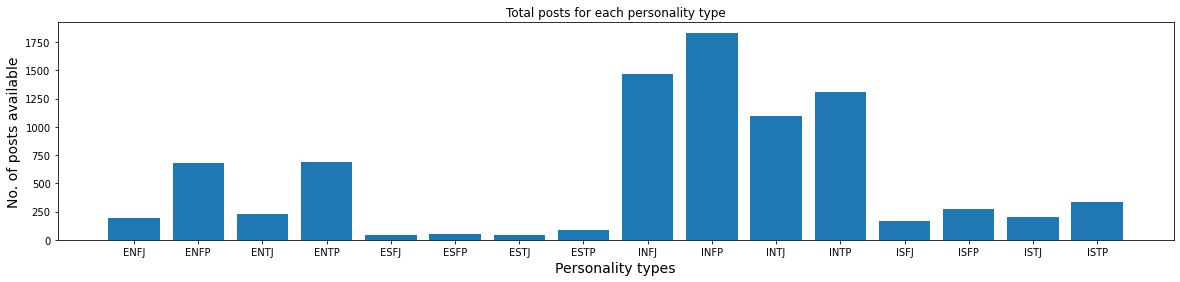

In [ ]:
plt.figure(figsize = (20,4))
plt.bar(np.array(total.index), height = total['posts'],)
plt.xlabel('Personality types', size = 14)
plt.ylabel('No. of posts available', size = 14)
plt.title('Total posts for each personality type')

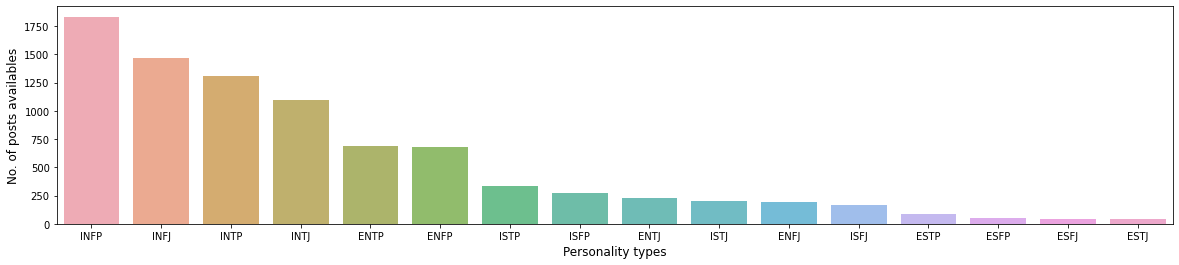

In [ ]:
#Plotting this in descending order for better understanding of this visualization
cnt_srs = data['type'].value_counts()
plt.figure(figsize=(20,4))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8)
plt.xlabel('Personality types', fontsize=12)
plt.ylabel('No. of posts availables', fontsize=12)
plt.show()

<AxesSubplot:xlabel='type', ylabel='words_per_comment'>

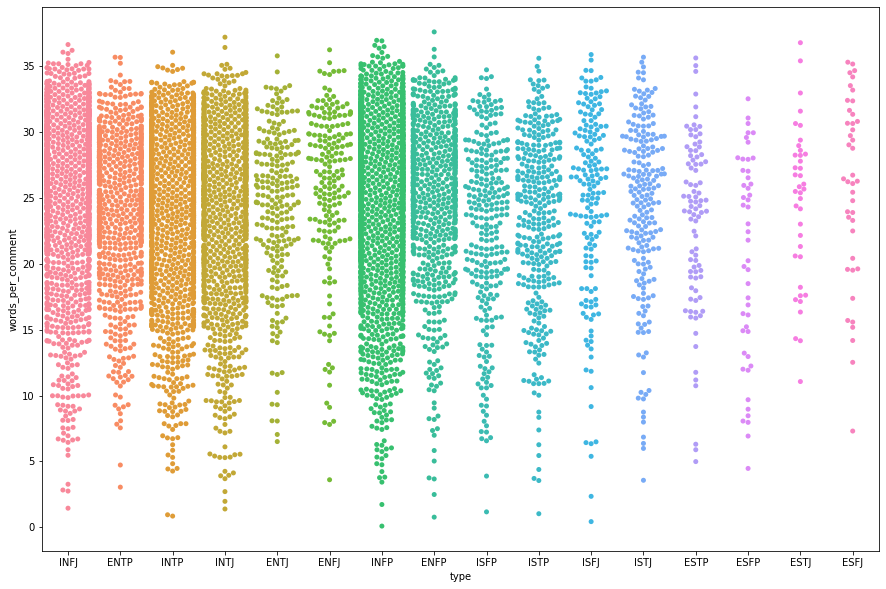

In [ ]:
#Swarm Plots, also called beeswarm plots, they plot all of the data points
df = data.copy()
#this function counts the no of words in each post of a user
def var_row(row):
    l = []
    for i in row.split('|||'):
        l.append(len(i.split()))
    return np.var(l)

#this function counts the no of words per post out of the total 50 posts in the whole row
df['words_per_comment'] = df['posts'].apply(lambda x: len(x.split())/50)
df['variance_of_word_counts'] = df['posts'].apply(lambda x: var_row(x))

plt.figure(figsize=(15,10))
sns.swarmplot("type", "words_per_comment", data=df)

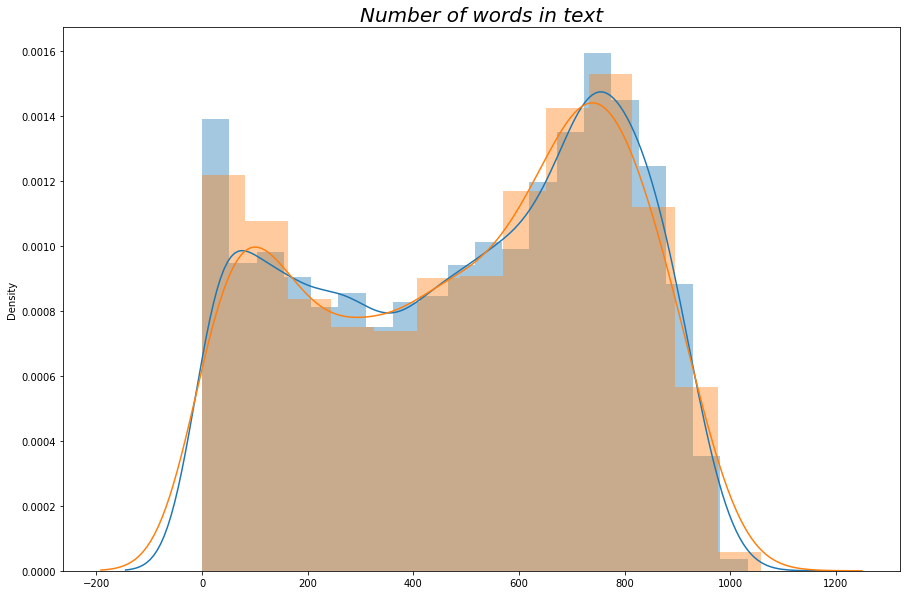

In [ ]:
plt.figure(figsize=(15,10))
sns.distplot(train_length,label='train data word length')
sns.distplot(test_length,label='test data word length')
plt.title('Number of words in text',fontdict={'size':20,'style':'italic'})
plt.show()

In [ ]:
px.pie(data,names='type',title='Personality type',hole=0.3)

### Unigram Analysis

Introduction to Unigram Analysis:

Unigram analysis is a text analysis method that treats each word in the text as a separate unit or "unigram." In this method, each word is considered independently, and the relationships and context between words are ignored.

Unigram analysis is commonly used in natural language processing tasks such as text classification, sentiment analysis, and information retrieval. It can help us understand the frequency and occurrence of different words in the text, revealing the themes, sentiments, and trends expressed in the text. For example, in sentiment analysis, we can use unigram analysis to identify frequently occurring words in the text and infer the sentiment expressed.

Although unigram analysis is simple and easy to use, it has some limitations. Since it ignores the relationships and context between words, it may miss some critical information, leading to less accurate analysis results. Therefore, in practical applications, we usually combine other text analysis methods, such as bigram analysis or word vector models, for a more comprehensive and accurate analysis.

In [ ]:
from collections import defaultdict

ISTJ_unigrams = defaultdict(int)
infj_unigrams = defaultdict(int)
intj_unigrams = defaultdict(int)
enfj_unigrams = defaultdict(int)
istp_unigrams = defaultdict(int)
ESFJ_unigrams = defaultdict(int)
infp_unigrams = defaultdict(int)
ESFP_unigrams = defaultdict(int)
ENFP_unigrams = defaultdict(int)
estp_unigrams = defaultdict(int)
ESTJ_unigrams = defaultdict(int)
entj_unigrams = defaultdict(int)
INTP_unigrams = defaultdict(int)
isfj_unigrams = defaultdict(int)
entp_unigrams = defaultdict(int)
isfp_unigrams = defaultdict(int)



for Text in data[data.type == "ISTJ"].posts:
    for word in generate_ngrams(Text):
        ISTJ_unigrams[word] += 1
        
for Text in data[data.type == "INFJ"].posts:
    for word in generate_ngrams(Text):
        infj_unigrams[word] += 1
        
for Text in data[data.type == "INTJ"].posts:
    for word in generate_ngrams(Text):
        intj_unigrams[word] += 1
        
for Text in data[data.type == "ENFJ"].posts:
    for word in generate_ngrams(Text):
        enfj_unigrams[word] += 1
        
for Text in data[data.type == "ISTP"].posts:
    for word in generate_ngrams(Text):
        istp_unigrams[word] += 1
        
for Text in data[data.type == "ESFJ"].posts:
    for word in generate_ngrams(Text):
        ESFJ_unigrams[word] += 1
        
for Text in data[data.type == "INFP"].posts:
    for word in generate_ngrams(Text):
        infp_unigrams[word] += 1
        
for Text in data[data.type == "ESFP"].posts:
    for word in generate_ngrams(Text):
        ESFP_unigrams[word] += 1
        
for Text in data[data.type == "ENFP"].posts:
    for word in generate_ngrams(Text):
        ENFP_unigrams[word] += 1
        
for Text in data[data.type == "ESTP"].posts:
    for word in generate_ngrams(Text):
        estp_unigrams[word] += 1
        
for Text in data[data.type == "ESTJ"].posts:
    for word in generate_ngrams(Text):
        ESTJ_unigrams[word] += 1
        
for Text in data[data.type == "ENTJ"].posts:
    for word in generate_ngrams(Text):
        entj_unigrams[word] += 1
        
for Text in data[data.type == "INTP"].posts:
    for word in generate_ngrams(Text):
        INTP_unigrams[word] += 1
        
for Text in data[data.type == "ISFJ"].posts:
    for word in generate_ngrams(Text):
        isfj_unigrams[word] += 1
        
for Text in data[data.type == "ENTP"].posts:
    for word in generate_ngrams(Text):
        entp_unigrams[word] += 1

for Text in data[data.type == "ISFP"].posts:
    for word in generate_ngrams(Text):
        isfp_unigrams[word] += 1


In [ ]:
df_ISTJ_unigrams = pd.DataFrame(
    sorted(ISTJ_unigrams.items(), key=lambda x: x[1], reverse=True)
)
df_INFJ_unigrams = pd.DataFrame(
    sorted(infj_unigrams.items(), key=lambda x: x[1], reverse=True)
)
df_INTJ_unigrams = pd.DataFrame(
    sorted(intj_unigrams.items(), key=lambda x: x[1], reverse=True)
)
df_ENFJ_unigrams = pd.DataFrame(
    sorted(enfj_unigrams.items(), key=lambda x: x[1], reverse=True)
)
df_ISTP_unigrams = pd.DataFrame(
    sorted(istp_unigrams.items(), key=lambda x: x[1], reverse=True)
)
df_ESFJ_unigrams = pd.DataFrame(
    sorted(ESFJ_unigrams.items(), key=lambda x: x[1], reverse=True)
)
df_INFP_unigrams = pd.DataFrame(
    sorted(infp_unigrams.items(), key=lambda x: x[1], reverse=True)
)
df_ESFP_unigrams = pd.DataFrame(
    sorted(ESFP_unigrams.items(), key=lambda x: x[1], reverse=True)
)
df_ENFP_unigrams = pd.DataFrame(
    sorted(ENFP_unigrams.items(), key=lambda x: x[1], reverse=True)
)
df_ESTP_unigrams = pd.DataFrame(
    sorted(estp_unigrams.items(), key=lambda x: x[1], reverse=True)
)
df_ESTJ_unigrams = pd.DataFrame(
    sorted(ESTJ_unigrams.items(), key=lambda x: x[1], reverse=True)
)
df_ENTJ_unigrams = pd.DataFrame(
    sorted(entj_unigrams.items(), key=lambda x: x[1], reverse=True)
)
df_INTP_unigrams = pd.DataFrame(
    sorted(INTP_unigrams.items(), key=lambda x: x[1], reverse=True)
)
df_ISFJ_unigrams = pd.DataFrame(
    sorted(isfj_unigrams.items(), key=lambda x: x[1], reverse=True)
)
df_ENTP_unigrams = pd.DataFrame(
    sorted(entp_unigrams.items(), key=lambda x: x[1], reverse=True)
)
df_ISFP_unigrams = pd.DataFrame(
    sorted(isfp_unigrams.items(), key=lambda x: x[1], reverse=True)
)


In [ ]:
ISTJ1 = df_ISTJ_unigrams[0][:10]
ISTJ2 = df_ISTJ_unigrams[1][:10]

INFJ1 = df_INFJ_unigrams[0][:10]
INFJ2 = df_INFJ_unigrams[1][:10]

INTJ1 = df_INTJ_unigrams[0][:10]
INTJ2 = df_INTJ_unigrams[1][:10]

ENFJ1 = df_ENFJ_unigrams[0][:10]
ENFJ2 = df_ENFJ_unigrams[1][:10]

ISTP1 = df_ISTP_unigrams[0][:10]
ISTP2 = df_ISTP_unigrams[1][:10]

ESFJ1 = df_ESFJ_unigrams[0][:10]
ESFJ2 = df_ESFJ_unigrams[1][:10]

INFP1 = df_INFP_unigrams[0][:10]
INFP2 = df_INFP_unigrams[1][:10]

ESFP1 = df_ESFP_unigrams[0][:10]
ESFP2 = df_ESFP_unigrams[1][:10]

ENFP1 = df_ENFP_unigrams[0][:10]
ENFP2 = df_ENFP_unigrams[1][:10]

ESTP1 = df_ESTP_unigrams[0][:10]
ESTP2 = df_ESTP_unigrams[1][:10]

ESTJ1 = df_ESTJ_unigrams[0][:10]
ESTJ2 = df_ESTJ_unigrams[1][:10]

ENTJ1 = df_ENTJ_unigrams[0][:10]
ENTJ2 = df_ENTJ_unigrams[1][:10]

INTP1 = df_INTP_unigrams[0][:10]
INTP2 = df_INTP_unigrams[1][:10]

ISFJ1 = df_ISFJ_unigrams[0][:10]
ISFJ2 = df_ISFJ_unigrams[1][:10]

ENTP1 = df_ENTP_unigrams[0][:10]
ENTP2 = df_ENTP_unigrams[1][:10]

ISFP1 = df_ISFP_unigrams[0][:10]
ISFP2 = df_ISFP_unigrams[1][:10]


In [ ]:
Personality_Types=['ISTJ','INFJ','INTJ','ENFJ','ISTP','ESFJ','INFP','ESFP','ENFP','ESTP','ESTJ','ENTJ','INTP','ISFJ','ENTP','ISFP']
dic={'ISTJ1':ISTJ1,'ISTJ2':ISTJ2,'INFJ1':INFJ1,'INFJ2':INFJ2,'INTJ1':INTJ1,'INTJ2':INTJ2,'ENFJ1':ENFJ1,'ENFJ2':ENFJ2,'ISTP1':ISTP1,'ISTP2':ISTP2,
     'ESFJ1':ESFJ1,'ESFJ2':ESFJ2,'INFP1':INFP1,'INFP2':INFP2,'ESFP1':ESFP1,'ESFP2':ESFP2,'ENFP1':ENFP1,'ENFP2':ENFP2,'ESTP1':ESTP1,
     'ESTP2':ESTP2,'ESTJ1':ESTJ1,'ESTJ2':ESTJ2,'ENTJ1':ENTJ1,'ENTJ2':ENTJ2,'INTP1':INTP1,'INTP2':INTP2,'ISFJ1':ISFJ1,'ISFJ2':ISFJ2,'ENTP1':ENTP1,'ENTP2':ENTP2,
     'ISFP1':ISFP1,'ISFP2':ISFP2
    }

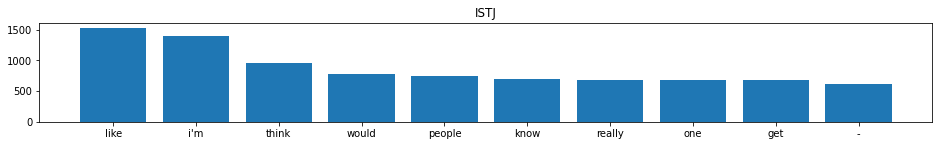

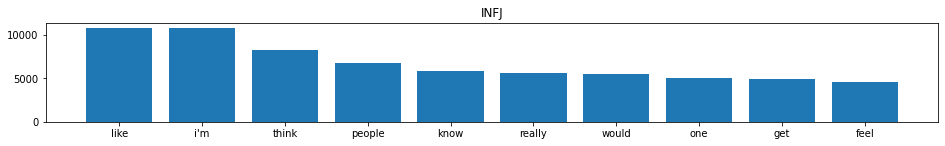

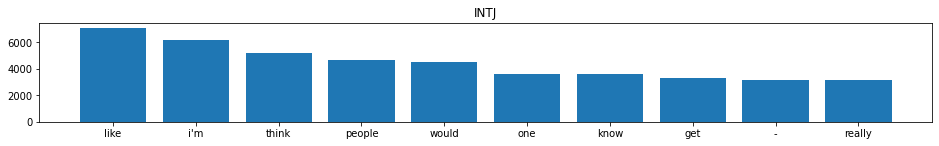

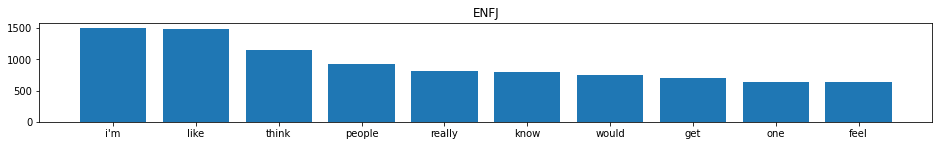

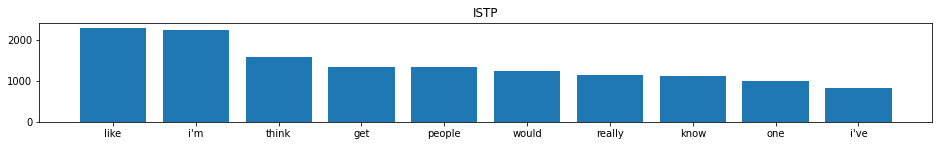

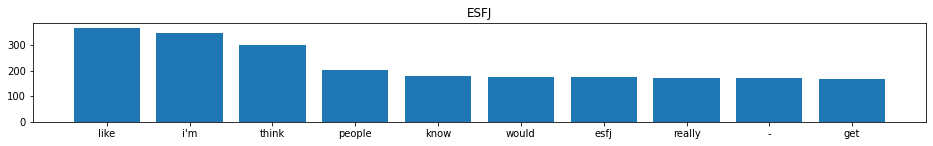

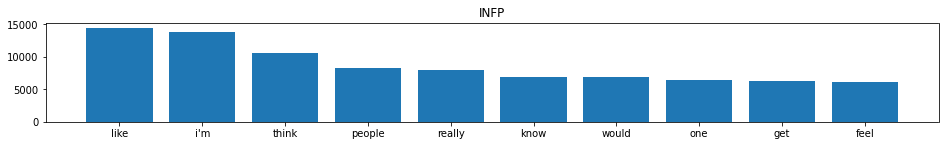

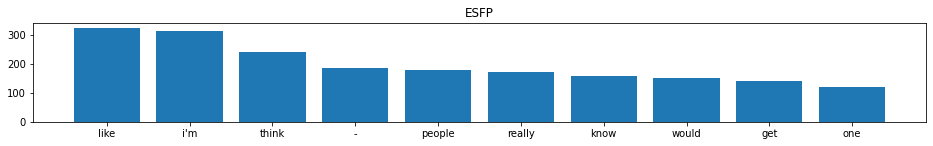

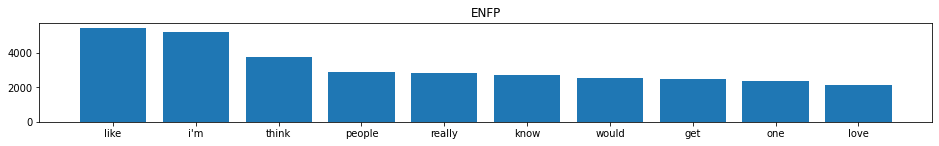

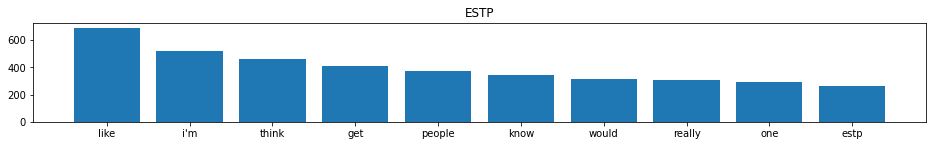

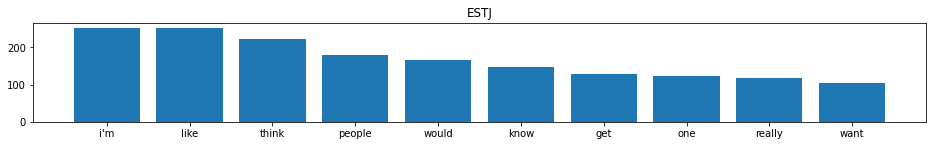

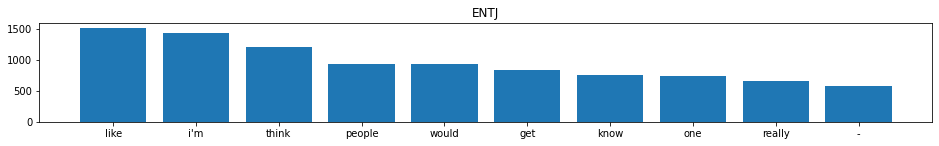

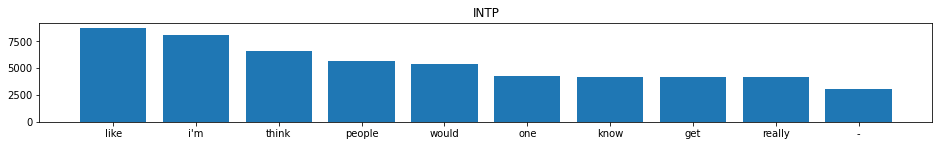

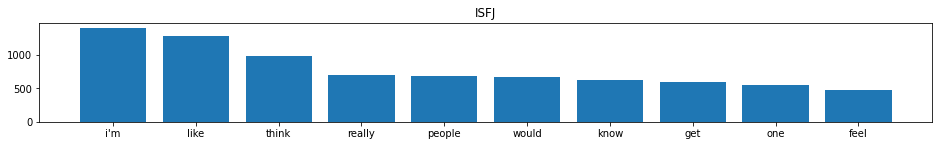

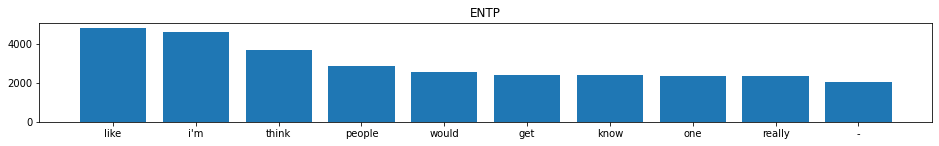

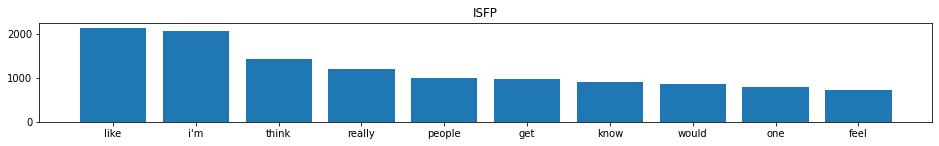

In [ ]:
for personality in Personality_Types:
    num=Personality_Types.index(personality)
    a1=personality+str(1)
    a1=dic[a1]
    a2=personality+str(2)
    a2=dic[a2]
    plt.figure(num, figsize=(16, 4))
    plt.subplot(2, 1, 1)
    plt.title(personality) 
    _ = plt.bar(a1,a2)
    



### Generating WordClouds


WordClouds are a popular visualization tool used to display the most frequent words in a text corpus in a visually appealing way. Generating WordClouds is a relatively simple process that can be achieved using various Python libraries such as matplotlib, wordcloud, and numpy.

In [ ]:
corpusForISTJ = create_corpus(data,"ISTJ")
corpusForINFJ = create_corpus(data,"INFJ")
corpusForINTJ = create_corpus(data,"INTJ")
corpusForENFJ = create_corpus(data,"ENFJ")
corpusForISTP = create_corpus(data,"ISTP")
corpusForESFJ = create_corpus(data,"ESFJ")
corpusForINFP = create_corpus(data,"INFP")
corpusForESFP = create_corpus(data,"ESFP")
corpusForENFP = create_corpus(data,"ENFP")
corpusForESTP = create_corpus(data,"ESTP")
corpusForESTJ = create_corpus(data,"ESTJ")
corpusForENTJ = create_corpus(data,"ENTJ")
corpusForINTP = create_corpus(data,"INTP")
corpusForISFJ = create_corpus(data,"ISFJ")
corpusForENTP = create_corpus(data,"ENTP")
corpusForISFP = create_corpus(data,"ISFP")

In [ ]:
word_cloud1 = WordCloud(background_color="white", max_font_size=80).generate(
    " ".join(corpusForISTJ[:50])
)
word_cloud2 = WordCloud(background_color="white", max_font_size=80).generate(
    " ".join(corpusForINFJ[:50])
)
word_cloud3 = WordCloud(background_color="white", max_font_size=80).generate(
    " ".join(corpusForINTJ[:50])
)
word_cloud4 = WordCloud(background_color="white", max_font_size=80).generate(
    " ".join(corpusForENFJ[:50])
)
word_cloud5 = WordCloud(background_color="white", max_font_size=80).generate(
    " ".join(corpusForISTP[:50])
)
word_cloud6 = WordCloud(background_color="white", max_font_size=80).generate(
    " ".join(corpusForESFJ[:50])
)
word_cloud7 = WordCloud(background_color="white", max_font_size=80).generate(
    " ".join(corpusForINFP[:50])
)
word_cloud8 = WordCloud(background_color="white", max_font_size=80).generate(
    " ".join(corpusForESFP[:50])
)
word_cloud9 = WordCloud(background_color="white", max_font_size=80).generate(
    " ".join(corpusForENFP[:50])
)
word_cloud10 = WordCloud(background_color="white", max_font_size=80).generate(
    " ".join(corpusForESTP[:50])
)
word_cloud11 = WordCloud(background_color="white", max_font_size=80).generate(
    " ".join(corpusForESTJ[:50])
)
word_cloud12 = WordCloud(background_color="white", max_font_size=80).generate(
    " ".join(corpusForENTJ[:50])
)
word_cloud13 = WordCloud(background_color="white", max_font_size=80).generate(
    " ".join(corpusForINTP[:50])
)
word_cloud14 = WordCloud(background_color="white", max_font_size=80).generate(
    " ".join(corpusForISFJ[:50])
)
word_cloud15 = WordCloud(background_color="white", max_font_size=80).generate(
    " ".join(corpusForENTP[:50])
)
word_cloud16 = WordCloud(background_color="white", max_font_size=80).generate(
    " ".join(corpusForISFP[:50])
)
wordcloud_List=[word_cloud1,word_cloud2,word_cloud3,word_cloud4,word_cloud5,word_cloud6,word_cloud7,word_cloud8, 
                word_cloud9,word_cloud10,word_cloud11,word_cloud12,word_cloud13,word_cloud14,word_cloud15,word_cloud16]
               

In [ ]:
wordcloud_List=[word_cloud1,word_cloud2,word_cloud3,word_cloud4,word_cloud5,word_cloud6,word_cloud7,word_cloud8, word_cloud9,word_cloud10,word_cloud11,word_cloud12,word_cloud13,word_cloud14,word_cloud15,word_cloud16]

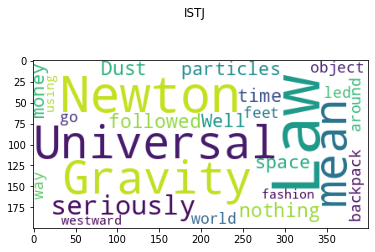

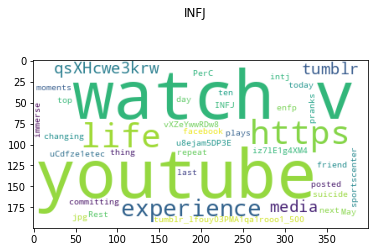

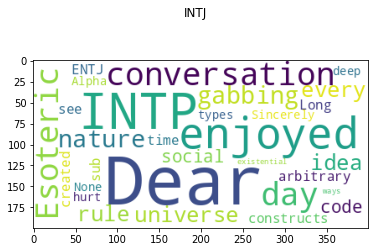

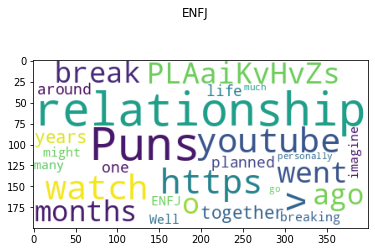

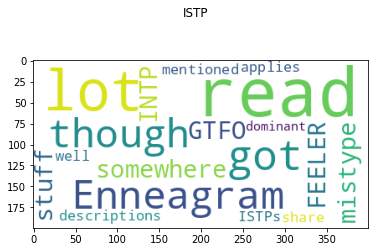

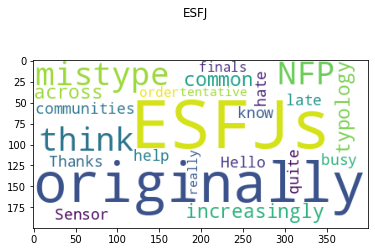

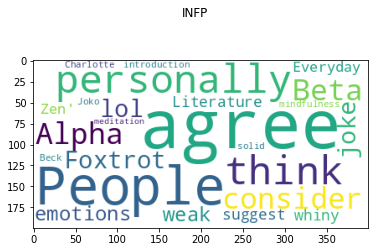

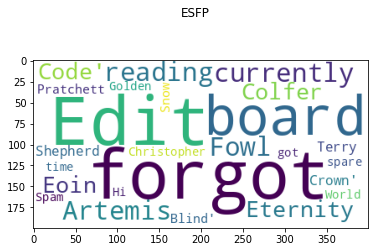

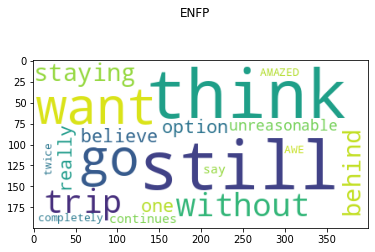

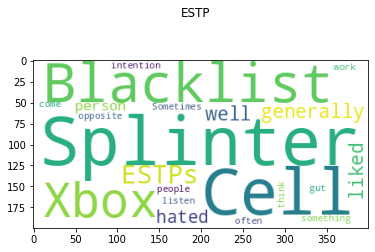

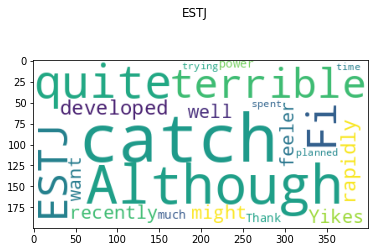

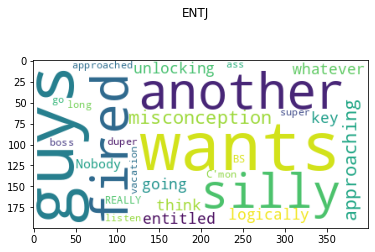

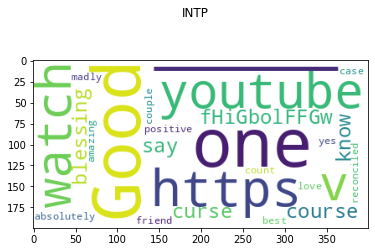

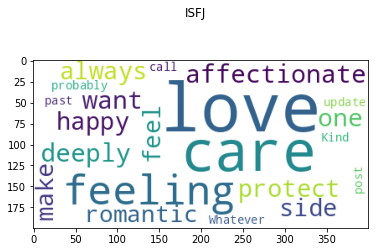

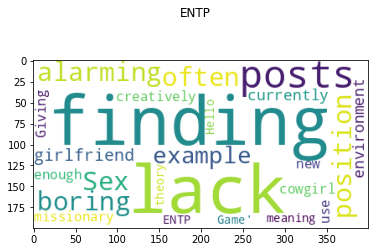

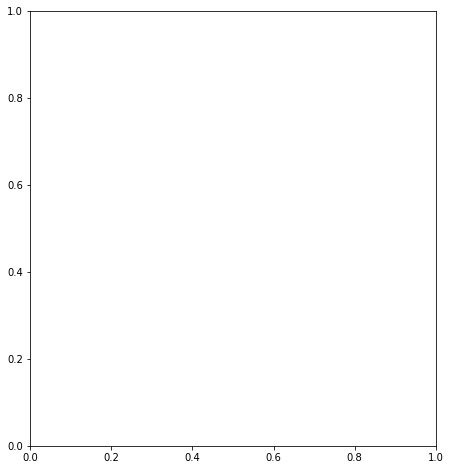

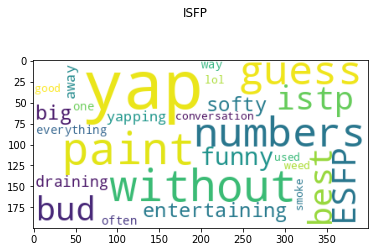

In [ ]:
for wordcloud in wordcloud_List:
    num=wordcloud_List.index(wordcloud)
    text=Personality_Types[num]
    plt.figure(22, figsize=(16, 8))
    plt.subplot(1, 2, 1)
    plt.figure()
    plt.imshow(wordcloud)
    plt.suptitle(text)


###Bag of words Embedding

Bag of Words (BoW) embedding is a popular technique used in natural language processing to represent text data in a numerical format that machine learning algorithms can process. The basic idea behind BoW embedding is to treat each document as a "bag" of its constituent words and convert the text into a matrix of word frequencies. This matrix can then be used as input to machine learning algorithms.

In [ ]:
data = data.sample(frac=1).reset_index(drop=True)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

def count_vect(data, ngrams=(1, 1)):
    count_vectorizer = CountVectorizer(ngram_range=ngrams)
    emb = count_vectorizer.fit_transform(data)

    return emb, count_vectorizer

In [ ]:
Data_counts, count_vectorizer = count_vect(data["posts"])

###TF-IDF Embedding

TF-IDF (Term Frequency-Inverse Document Frequency) is a widely used text embedding technique in natural language processing that aims to capture the importance of words in a document and the entire corpus. Unlike Bag of Words (BoW) embedding, which simply counts the frequency of words in a document, TF-IDF embedding takes into account the frequency of a word in the document as well as its frequency in the corpus. This allows TF-IDF embedding to give more weight to words that are important in a specific document, while downplaying common words that occur frequently in the entire corpus.



In [ ]:
class Lemmatizer(object):
    def __init__(self):
        self.lemmatizer = WordNetLemmatizer()
    def __call__(self, sentence):
        return [self.lemmatizer.lemmatize(word) for word in sentence.split() if len(word)>2]

In [ ]:
vectorizer=TfidfVectorizer( max_features=5000,stop_words='english',tokenizer=Lemmatizer())
vectorizer.fit(data.posts)

TfidfVectorizer(max_features=5000, stop_words='english',
                tokenizer=<__main__.Lemmatizer object at 0x7f0ae26ab7f0>)

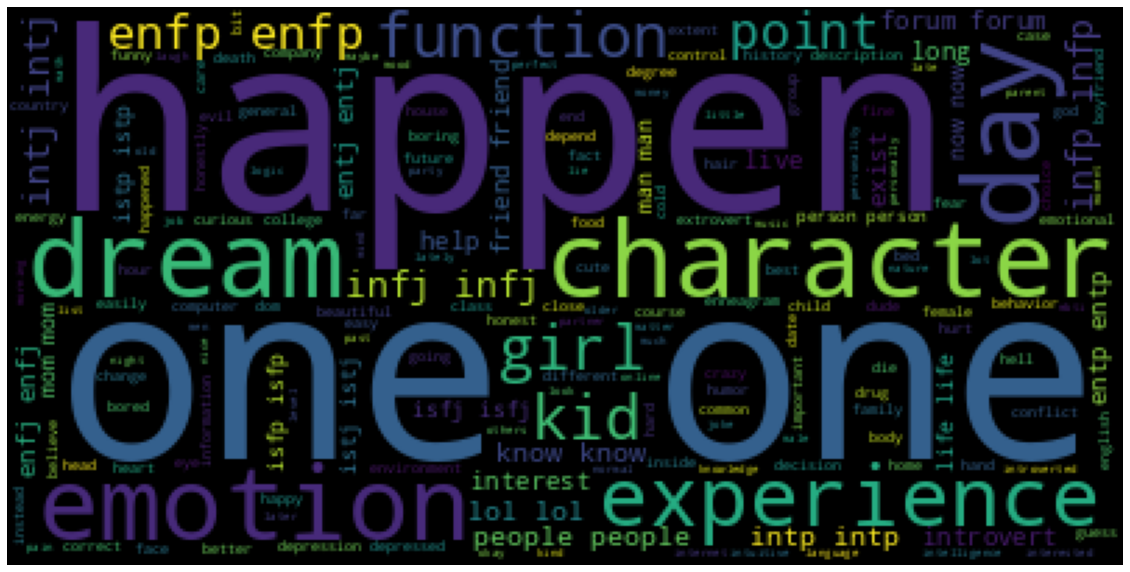

In [ ]:
feature_names=vectorizer.get_feature_names_out()
wc=WordCloud(max_words=400)
wc.generate(' '.join(word for word in feature_names[500:3500] ))
plt.figure(figsize=(20,15))
plt.axis('off')
plt.imshow(wc)

In [ ]:
train_post=vectorizer.transform(train_data.posts).toarray()
test_post=vectorizer.transform(test_data.posts).toarray()

In [ ]:
train_post.shape

(6940, 5000)

In [ ]:
target_encoder=LabelEncoder()
train_target=target_encoder.fit_transform(train_data.type)
test_target=target_encoder.fit_transform(test_data.type)

In [ ]:
def tfidf(data, ngrams=(1, 1)):
    tfidf_vectorizer = TfidfVectorizer(ngram_range=ngrams)
    train = tfidf_vectorizer.fit_transform(data)

    return train, tfidf_vectorizer

In [ ]:
Data_tfidf, tfidf_vectorizer = tfidf(data["type"])


###Visualizing the embeddings

In [ ]:
def plot_LSA(test_data, test_labels, plot=True):
    lsa = TruncatedSVD(n_components=2)
    lsa.fit(test_data)
    lsa_scores = lsa.transform(test_data)
    color_mapper = {label:idx for idx,label in enumerate(set(test_labels))}
    color_column = [color_mapper[label] for label in test_labels]
    colors = ['orange','blue','green','red','cyan','magenta','yellow','black','white','plum','olive','gold','coral','teal','peru','tan']
    if plot:
        plt.scatter(lsa_scores[:,0], lsa_scores[:,1], s=8, alpha=.8, c=test_labels, cmap=matplotlib.colors.ListedColormap(colors))
        orange_patch = mpatches.Patch(color="orange", label="ISTJ")
        blue_patch = mpatches.Patch(color="blue", label="INFJ")
        green_patch = mpatches.Patch(color="green", label="INTJ")
        red_patch = mpatches.Patch(color="red", label="ENFJ")
        cyan_patch = mpatches.Patch(color="cyan", label="ISTP")
        magenta_patch = mpatches.Patch(color="magenta", label="ESFJ")
        yellow_patch = mpatches.Patch(color="yellow", label="INFP")
        black_patch = mpatches.Patch(color="black", label="ESFP")
        white_patch = mpatches.Patch(color="white", label="ENFP")
        plum_patch = mpatches.Patch(color="plum", label="ESTP")
        olive_patch = mpatches.Patch(color="olive", label="ESTJ")
        gold_patch = mpatches.Patch(color="gold", label="ENTJ")
        coral_patch = mpatches.Patch(color="coral", label="INTP")
        teal_patch = mpatches.Patch(color="teal", label="ISFJ")
        peru_patch = mpatches.Patch(color="peru", label="ENTP")
        tan_patch = mpatches.Patch(color="tan", label="ISFP")
        plt.xlabel('Principal Component One')
        plt.ylabel('Principal Component Two')
        plt.rcParams["xtick.labelsize"] = 20
        plt.rcParams["ytick.labelsize"] = 20



In [ ]:
X_counts = Data_counts
X_tfidf =Data_tfidf
y = data["type"].values

from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
y1=label_encoder.fit_transform(data['type'])

Text(0.5, 1.0, 'TF-IDF Embedding visualization')

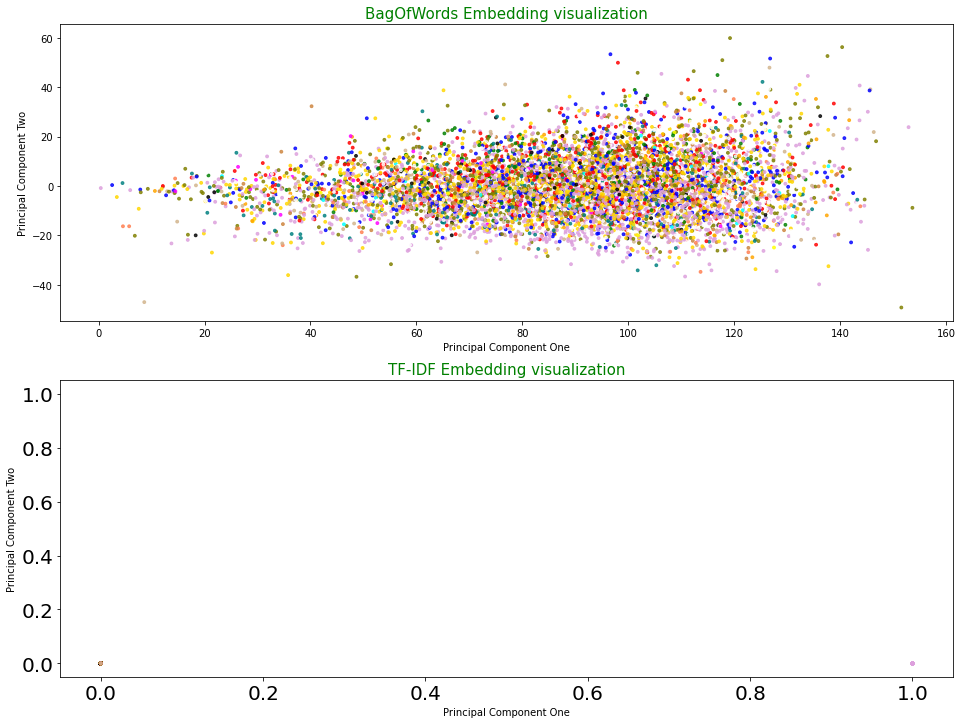

In [ ]:
plt.figure(1, figsize=(16, 12))
plt.subplot(2, 1, 1)
plot_LSA(X_counts, y1)
plt.title(label="BagOfWords Embedding visualization", 
          loc="center",
          fontsize=15, 
          color="green")
plt.subplot(2, 1, 2)
plot_LSA(X_tfidf, y1)
plt.title(label="TF-IDF Embedding visualization", 
          loc="center",
          fontsize=15, 
          color="green")

##Model Building and Evaluation

In this section we will use 10 different machine learning classification models to train the dataset and we want to find the one with the highest ACCURACY value for the test set, after which in our SUMMARY section we will use a graph to visually compare.

In [ ]:
models_accuracy={}

###Logistic Regression

In [ ]:
model_log = LogisticRegression(max_iter=3000, C=0.5, n_jobs=-1)
model_log.fit(train_post, train_target)

LogisticRegression(C=0.5, max_iter=3000, n_jobs=-1)

In [ ]:
print('train classification report \n ',classification_report(train_target,model_log.predict(train_post),target_names=target_encoder.inverse_transform([i for i in range(16)])))

train classification report 
                precision    recall  f1-score   support

        ENFJ       0.74      0.09      0.16       152
        ENFP       0.75      0.49      0.60       540
        ENTJ       0.92      0.26      0.41       185
        ENTP       0.80      0.57      0.67       548
        ESFJ       0.00      0.00      0.00        33
        ESFP       0.00      0.00      0.00        38
        ESTJ       0.00      0.00      0.00        31
        ESTP       0.80      0.06      0.11        71
        INFJ       0.69      0.77      0.73      1176
        INFP       0.56      0.90      0.69      1466
        INTJ       0.71      0.76      0.74       873
        INTP       0.68      0.81      0.74      1043
        ISFJ       0.85      0.17      0.29       133
        ISFP       0.81      0.23      0.36       217
        ISTJ       0.78      0.22      0.34       164
        ISTP       0.80      0.42      0.55       270

    accuracy                           0.66      

In [ ]:
print('test classification report \n',classification_report(test_target,model_log.predict(test_post),target_names=target_encoder.inverse_transform([i for i in range(16)])))

test classification report 
               precision    recall  f1-score   support

        ENFJ       0.50      0.03      0.05        38
        ENFP       0.63      0.39      0.48       135
        ENTJ       0.83      0.11      0.19        46
        ENTP       0.56      0.39      0.46       137
        ESFJ       0.00      0.00      0.00         9
        ESFP       0.00      0.00      0.00        10
        ESTJ       0.00      0.00      0.00         8
        ESTP       0.00      0.00      0.00        18
        INFJ       0.59      0.62      0.61       294
        INFP       0.46      0.83      0.59       366
        INTJ       0.62      0.59      0.60       218
        INTP       0.62      0.74      0.68       261
        ISFJ       0.33      0.03      0.06        33
        ISFP       0.50      0.11      0.18        54
        ISTJ       0.83      0.12      0.21        41
        ISTP       0.72      0.34      0.46        67

    accuracy                           0.55      17

In [ ]:
models_accuracy['logistic regression']=accuracy_score(test_target,model_log.predict(test_post))

###Linear Support Vector classifier

In [ ]:
model_linear_svc=LinearSVC(C=0.1)
model_linear_svc.fit(train_post,train_target)

LinearSVC(C=0.1)

In [ ]:
print('train classification report \n ',classification_report(train_target,model_linear_svc.predict(train_post),target_names=target_encoder.inverse_transform([i for i in range(16)])))
print('test classification report \n',classification_report(test_target,model_linear_svc.predict(test_post),target_names=target_encoder.inverse_transform([i for i in range(16)])))

train classification report 
                precision    recall  f1-score   support

        ENFJ       0.87      0.36      0.51       152
        ENFP       0.78      0.63      0.70       540
        ENTJ       0.89      0.54      0.67       185
        ENTP       0.83      0.74      0.79       548
        ESFJ       0.92      0.33      0.49        33
        ESFP       1.00      0.05      0.10        38
        ESTJ       0.88      0.23      0.36        31
        ESTP       0.84      0.38      0.52        71
        INFJ       0.76      0.80      0.78      1176
        INFP       0.68      0.90      0.77      1466
        INTJ       0.78      0.82      0.80       873
        INTP       0.76      0.85      0.80      1043
        ISFJ       0.87      0.53      0.66       133
        ISFP       0.82      0.49      0.62       217
        ISTJ       0.89      0.60      0.72       164
        ISTP       0.87      0.73      0.79       270

    accuracy                           0.76      

In [ ]:
models_accuracy['Linear Support Vector classifier']=accuracy_score(test_target,model_linear_svc.predict(test_post))

###Support Vector classifier

In [ ]:
model_svc=SVC()
model_svc.fit(train_post,train_target)

SVC()

In [ ]:
print('train classification report \n ',classification_report(train_target,model_svc.predict(train_post),target_names=target_encoder.inverse_transform([i for i in range(16)])))
print('test classification report \n ',classification_report(test_target,model_svc.predict(test_post),target_names=target_encoder.inverse_transform([i for i in range(16)])))

train classification report 
                precision    recall  f1-score   support

        ENFJ       0.95      0.70      0.81       152
        ENFP       0.95      0.91      0.93       540
        ENTJ       0.97      0.82      0.89       185
        ENTP       0.96      0.93      0.95       548
        ESFJ       1.00      0.61      0.75        33
        ESFP       1.00      0.34      0.51        38
        ESTJ       0.93      0.42      0.58        31
        ESTP       1.00      0.75      0.85        71
        INFJ       0.93      0.95      0.94      1176
        INFP       0.85      0.98      0.91      1466
        INTJ       0.96      0.95      0.96       873
        INTP       0.93      0.96      0.95      1043
        ISFJ       0.98      0.77      0.86       133
        ISFP       0.96      0.82      0.89       217
        ISTJ       0.95      0.86      0.90       164
        ISTP       0.97      0.90      0.93       270

    accuracy                           0.92      

In [ ]:
models_accuracy['Support Vector classifier']=accuracy_score(test_target,model_svc.predict(test_post))

###Multinomial Naive Bayes

In [ ]:
model_multinomial_nb=MultinomialNB()
model_multinomial_nb.fit(train_post,train_target)

MultinomialNB()

In [ ]:
print('train classification report \n ',classification_report(train_target,model_multinomial_nb.predict(train_post),target_names=target_encoder.inverse_transform([i for i in range(16)])))
print('test classification report \n ',classification_report(test_target,model_multinomial_nb.predict(test_post),target_names=target_encoder.inverse_transform([i for i in range(16)])))

train classification report 
                precision    recall  f1-score   support

        ENFJ       0.00      0.00      0.00       152
        ENFP       0.67      0.00      0.01       540
        ENTJ       0.00      0.00      0.00       185
        ENTP       1.00      0.01      0.01       548
        ESFJ       0.00      0.00      0.00        33
        ESFP       0.00      0.00      0.00        38
        ESTJ       0.00      0.00      0.00        31
        ESTP       0.00      0.00      0.00        71
        INFJ       0.56      0.45      0.50      1176
        INFP       0.29      0.97      0.44      1466
        INTJ       0.89      0.23      0.37       873
        INTP       0.60      0.46      0.52      1043
        ISFJ       0.00      0.00      0.00       133
        ISFP       0.00      0.00      0.00       217
        ISTJ       0.00      0.00      0.00       164
        ISTP       0.00      0.00      0.00       270

    accuracy                           0.38      

In [ ]:
models_accuracy['Multinomial Naive Bayes']=accuracy_score(test_target,model_multinomial_nb.predict(test_post))

###Decision Tree Classifier

In [ ]:
model_tree=DecisionTreeClassifier(max_depth=14)
model_tree.fit(train_post,train_target)

DecisionTreeClassifier(max_depth=14)

In [ ]:
print('train classification report \n ',classification_report(train_target,model_tree.predict(train_post),target_names=target_encoder.inverse_transform([i for i in range(16)])))
print('test classification report \n ',classification_report(test_target,model_tree.predict(test_post),target_names=target_encoder.inverse_transform([i for i in range(16)])))

train classification report 
                precision    recall  f1-score   support

        ENFJ       0.70      0.42      0.52       152
        ENFP       0.87      0.60      0.71       540
        ENTJ       0.80      0.62      0.70       185
        ENTP       0.92      0.67      0.78       548
        ESFJ       1.00      0.27      0.43        33
        ESFP       1.00      0.32      0.48        38
        ESTJ       0.75      0.29      0.42        31
        ESTP       1.00      0.34      0.51        71
        INFJ       0.84      0.73      0.78      1176
        INFP       0.51      0.93      0.66      1466
        INTJ       0.85      0.73      0.79       873
        INTP       0.81      0.73      0.77      1043
        ISFJ       0.93      0.40      0.56       133
        ISFP       0.78      0.38      0.51       217
        ISTJ       0.62      0.56      0.59       164
        ISTP       0.95      0.61      0.74       270

    accuracy                           0.71      

In [ ]:
models_accuracy['Decision Tree classifier']=accuracy_score(test_target,model_tree.predict(test_post))

###Random Forest Classifier

In [ ]:
model_forest=RandomForestClassifier(max_depth=10)
model_forest.fit(train_post,train_target)

RandomForestClassifier(max_depth=10)

In [ ]:
print('train classification report \n ',classification_report(train_target,model_forest.predict(train_post),target_names=target_encoder.inverse_transform([i for i in range(16)])))
print('test classification report \n ',classification_report(test_target,model_forest.predict(test_post),target_names=target_encoder.inverse_transform([i for i in range(16)])))

train classification report 
                precision    recall  f1-score   support

        ENFJ       1.00      0.01      0.03       152
        ENFP       1.00      0.15      0.27       540
        ENTJ       1.00      0.01      0.02       185
        ENTP       0.96      0.50      0.66       548
        ESFJ       0.00      0.00      0.00        33
        ESFP       0.00      0.00      0.00        38
        ESTJ       0.00      0.00      0.00        31
        ESTP       1.00      0.03      0.05        71
        INFJ       0.81      0.71      0.76      1176
        INFP       0.38      0.99      0.55      1466
        INTJ       0.90      0.68      0.77       873
        INTP       0.83      0.74      0.78      1043
        ISFJ       1.00      0.01      0.01       133
        ISFP       1.00      0.02      0.05       217
        ISTJ       1.00      0.02      0.04       164
        ISTP       1.00      0.27      0.42       270

    accuracy                           0.59      

In [ ]:
models_accuracy['Random Forest Classifier']=accuracy_score(test_target,model_forest.predict(test_post))

###XGBoost Classifier

In [ ]:
model_xgb=XGBClassifier(gpu_id=0,tree_method='gpu_hist',max_depth=5,n_estimators=50,learning_rate=0.1)
model_xgb.fit(train_post,train_target)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=50, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [ ]:
print('train classification report \n ',classification_report(train_target,model_xgb.predict(train_post),target_names=target_encoder.inverse_transform([i for i in range(16)])))
print('test classification report \n ',classification_report(test_target,model_xgb.predict(test_post),target_names=target_encoder.inverse_transform([i for i in range(16)])))

train classification report 
                precision    recall  f1-score   support

        ENFJ       0.98      0.78      0.86       152
        ENFP       0.91      0.74      0.82       540
        ENTJ       0.95      0.78      0.86       185
        ENTP       0.92      0.81      0.86       548
        ESFJ       1.00      0.94      0.97        33
        ESFP       1.00      0.79      0.88        38
        ESTJ       1.00      0.84      0.91        31
        ESTP       0.98      0.85      0.91        71
        INFJ       0.88      0.83      0.86      1176
        INFP       0.72      0.93      0.81      1466
        INTJ       0.86      0.86      0.86       873
        INTP       0.86      0.85      0.86      1043
        ISFJ       0.95      0.83      0.88       133
        ISFP       0.93      0.76      0.84       217
        ISTJ       0.96      0.84      0.89       164
        ISTP       0.92      0.85      0.88       270

    accuracy                           0.85      

In [ ]:
models_accuracy['XGBoost Classifier']=accuracy_score(test_target,model_xgb.predict(test_post))

###CatBoost Classifier

In [ ]:
model_cat=CatBoostClassifier(loss_function='MultiClass', eval_metric='MultiClass', task_type='GPU', verbose=False)
model_cat.fit(train_post, train_target)

In [ ]:
print('train classification report \n ',classification_report(train_target,model_cat.predict(train_post),target_names=target_encoder.inverse_transform([i for i in range(16)])))
print('test classification report \n ',classification_report(test_target,model_cat.predict(test_post),target_names=target_encoder.inverse_transform([i for i in range(16)])))

train classification report 
                precision    recall  f1-score   support

        ENFJ       0.89      0.42      0.57       152
        ENFP       0.80      0.63      0.70       540
        ENTJ       0.86      0.56      0.68       185
        ENTP       0.81      0.72      0.76       548
        ESFJ       1.00      0.36      0.53        33
        ESFP       1.00      0.18      0.31        38
        ESTJ       1.00      0.29      0.45        31
        ESTP       0.90      0.49      0.64        71
        INFJ       0.79      0.79      0.79      1176
        INFP       0.64      0.88      0.74      1466
        INTJ       0.78      0.78      0.78       873
        INTP       0.76      0.82      0.79      1043
        ISFJ       0.85      0.54      0.66       133
        ISFP       0.78      0.52      0.62       217
        ISTJ       0.79      0.59      0.67       164
        ISTP       0.84      0.70      0.77       270

    accuracy                           0.75      

In [ ]:
models_accuracy['CatBoost Classifier']=accuracy_score(test_target,model_cat.predict(test_post))

###KNN Classifier

In [ ]:
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(train_post, train_target)

KNeighborsClassifier()

In [ ]:
print('train classification report \n ',classification_report(train_target,model_knn.predict(train_post),target_names=target_encoder.inverse_transform([i for i in range(16)])))
print('test classification report \n ',classification_report(test_target,model_knn.predict(test_post),target_names=target_encoder.inverse_transform([i for i in range(16)])))

train classification report 
                precision    recall  f1-score   support

        ENFJ       0.98      0.97      0.97       152
        ENFP       0.13      0.99      0.23       540
        ENTJ       0.00      0.00      0.00       185
        ENTP       0.52      0.02      0.04       548
        ESFJ       0.71      0.15      0.25        33
        ESFP       0.82      0.87      0.85        38
        ESTJ       0.00      0.00      0.00        31
        ESTP       0.00      0.00      0.00        71
        INFJ       0.97      0.98      0.98      1176
        INFP       0.99      0.98      0.98      1466
        INTJ       0.71      0.01      0.01       873
        INTP       0.80      0.01      0.02      1043
        ISFJ       0.25      0.02      0.03       133
        ISFP       1.00      0.03      0.05       217
        ISTJ       1.00      0.01      0.01       164
        ISTP       0.67      0.01      0.03       270

    accuracy                           0.48      

In [ ]:
models_accuracy['KNN Classifier'] = accuracy_score(test_target, model_knn.predict(test_post))

###SGD Classifier

In [ ]:
model_sgd = SGDClassifier()
model_sgd.fit(train_post, train_target)

SGDClassifier()

In [ ]:
print('train classification report \n', classification_report(train_target, model_sgd.predict(train_post), target_names=target_encoder.inverse_transform([i for i in range(16)])))
print('test classification report \n', classification_report(test_target, model_sgd.predict(test_post), target_names=target_encoder.inverse_transform([i for i in range(16)])))

train classification report 
               precision    recall  f1-score   support

        ENFJ       0.88      0.82      0.85       152
        ENFP       0.77      0.88      0.82       540
        ENTJ       0.97      0.83      0.89       185
        ENTP       0.93      0.83      0.88       548
        ESFJ       0.96      0.79      0.87        33
        ESFP       1.00      0.79      0.88        38
        ESTJ       0.88      0.71      0.79        31
        ESTP       0.85      0.93      0.89        71
        INFJ       0.89      0.86      0.87      1176
        INFP       0.88      0.88      0.88      1466
        INTJ       0.88      0.89      0.89       873
        INTP       0.86      0.90      0.88      1043
        ISFJ       0.91      0.88      0.89       133
        ISFP       0.85      0.91      0.88       217
        ISTJ       0.86      0.88      0.87       164
        ISTP       0.94      0.92      0.93       270

    accuracy                           0.88      6

In [ ]:
models_accuracy['SGD Classifier'] = accuracy_score(test_target, model_sgd.predict(test_post))

### **Summary graphes**

In [ ]:
models_accuracy

{'logistic regression': 0.5510086455331412,
 'Linear Support Vector classifier': 0.579250720461095,
 'Support Vector classifier': 0.562536023054755,
 'Multinomial Naive Bayes': 0.32046109510086457,
 'Decision Tree classifier': 0.45302593659942364,
 'Random Forest Classifier': 0.4080691642651297,
 'XGBoost Classifier': 0.58328530259366,
 'CatBoost Classifier': 0.590778097982709,
 'KNN Classifier': 0.08011527377521614,
 'SGD Classifier': 0.5671469740634005}

In [ ]:
models_accuracy.keys()

dict_keys(['logistic regression', 'Linear Support Vector classifier', 'Support Vector classifier', 'Multinomial Naive Bayes', 'Decision Tree classifier', 'Random Forest Classifier', 'XGBoost Classifier', 'CatBoost Classifier', 'KNN Classifier', 'SGD Classifier'])

In [ ]:
accuarcy=pd.DataFrame(models_accuracy.items(),columns=['Models','Test accuracy'])

In [ ]:
accuarcy.sort_values(by='Test accuracy',ascending=False,ignore_index=True).style.background_gradient(cmap='Blues')

,Models,Test accuracy
0,CatBoost Classifier,0.590778
1,XGBoost Classifier,0.583285
2,Linear Support Vector classifier,0.579251
3,SGD Classifier,0.567147
4,Support Vector classifier,0.562536
5,logistic regression,0.551009
6,Decision Tree classifier,0.453026
7,Random Forest Classifier,0.408069
8,Multinomial Naive Bayes,0.320461
9,KNN Classifier,0.080115


### Embedding and LSTM Recurrent Neural Network

My current text data is continuous. Recurrent Neural Network (RNN) is the most advanced algorithm for sequential data. It is the first algorithm that remembers its inputs, which, thanks to an internal memory, makes it perfectly suited to machine learning problems involving sequential data.

In an RNN, information circulates in a loop. When it makes a decision, it takes into account the current input and what it has learned from the previous inputs it has received.

Long Short Term Memory (LSTM) networks are a type of RNN model that avoids the problem of gradient disappearance by adding a 'forgetting' gate.


In [ ]:
#I'm going  to count the occurrences of each word in our corpus, so I use a counter for that
from collections import Counter

# Count unique words
def counter_word(text):
    count = Counter()
    for i in text.values:
        for word in i.split():
            count[word] += 1
    return count

In [ ]:
Text = data.posts
counter = counter_word(Text)
print(f"My corpus have {len(counter)} unique words")

My corpus have 599409 unique words


Now I'm going to define the maximum sequence length, which means the maximum length of each row. The reason for defining the sequence length is that when we use it with TensorFlow we will have the same sequence length for each row, so I won't be able to have posts with different sequence lengths and I will map them to the same sequence length.

In [ ]:
num_words = len(counter)
# Max number of words in a sequence
max_length = 150

In [ ]:
#Doing HotOneEncding
Hot_One_Encoding=pd.get_dummies(data['type'], prefix='type')
y=Hot_One_Encoding
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
y=label_encoder.fit_transform(data['type'])
X_train, X_test, y_train, y_test =train_test_split(X_counts,y , test_size=0.2)

In [ ]:
X=data["posts"]

#numeric enoded y
y
#categorical variables y
y1 = data["type"].values

# HotOneEncding y
y2= Hot_One_Encoding

In [ ]:
X_train, X_test, y_train, y_test =train_test_split(X,y2 , test_size=0.2,random_state=2020)

Now I need to tokenize the train sentences

In [ ]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=num_words)
tokenizer.fit_on_texts(X_train)

In [ ]:
word_index = tokenizer.word_index

In [ ]:
list(word_index.items())[:10]


[('i', 1),
 ('the', 2),
 ('to', 3),
 ('a', 4),
 ('and', 5),
 ('of', 6),
 ('you', 7),
 ('that', 8),
 ('it', 9),
 ('is', 10)]

Now I have an index for each word in my tokenizer

In [ ]:
import pickle

# saving
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
train_sequences = tokenizer.texts_to_sequences(X_train)

now I can pad the sequences(Reddit posts) to have a specific length because we want to map all our sequences to the same length and I'm going to use the pad_sequences method from Keras to add sequences to the specific length

In [ ]:
seq=np.array(train_sequences[0:5])
seq.T

array([list([8089, 7790, 156, 232, 7, 14, 3448, 10985, 2, 497, 52, 6, 17, 7, 4413, 4, 102, 6, 2276, 11, 2, 80, 1, 2598, 5, 1, 623, 38, 5917, 3, 32, 27, 105, 4, 76, 129, 1, 1815, 14, 71, 4, 870, 11, 2, 1095, 54142, 7, 14, 71, 76, 41, 81, 562, 54, 9, 177, 589, 839, 2497, 1070, 3131, 10, 21, 81, 54143, 3099, 173, 20, 226, 97, 1, 56, 184, 12, 796, 12533, 660, 748, 3, 1594, 17, 241, 1295, 7354, 13, 11, 25, 4561, 80, 13, 734, 100, 29, 1, 7355, 65, 78, 10986, 19, 139, 4, 6646, 9742, 19379, 1462, 1589, 4, 705, 67, 842, 51, 3, 32, 77, 51, 21982, 1, 70, 1134, 5567, 59, 3, 114, 3340, 4, 1809, 31, 81, 50, 1845, 12, 11826, 33167, 9398, 54144, 39818, 4, 185, 167, 341, 7, 135, 3, 6393, 5, 3597, 2, 7982, 3, 53, 3002, 3, 2, 28869, 1254, 16, 796, 10, 45, 119, 13, 9, 15378, 120, 4141, 400, 10, 216, 256, 232, 455, 8483, 10, 722, 14, 2819, 6, 4999, 2025, 400, 54, 734, 17, 40, 282, 4921, 10, 108, 26, 3937, 26, 39, 7, 1693, 52, 25, 33168, 3149, 2, 973, 94, 73, 10290, 147, 79, 8, 191, 37, 15, 1659, 2, 39819, 

My first four posts have sequences of different sizes and I want them to have the same size

Now I can fill the sequences to a specific length because I want to map all the sequences to the same length, I will use Keras' pad_sequences method to add sequences of a specific length because when we use the LSTM architecture we need to have sequences of the same length.

In [ ]:
!pip install tensorflow --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_padded = pad_sequences(
    train_sequences, maxlen=max_length, padding="post", truncating="post"
)

In [ ]:
train_padded[0]

array([ 8089,  7790,   156,   232,     7,    14,  3448, 10985,     2,
         497,    52,     6,    17,     7,  4413,     4,   102,     6,
        2276,    11,     2,    80,     1,  2598,     5,     1,   623,
          38,  5917,     3,    32,    27,   105,     4,    76,   129,
           1,  1815,    14,    71,     4,   870,    11,     2,  1095,
       54142,     7,    14,    71,    76,    41,    81,   562,    54,
           9,   177,   589,   839,  2497,  1070,  3131,    10,    21,
          81, 54143,  3099,   173,    20,   226,    97,     1,    56,
         184,    12,   796, 12533,   660,   748,     3,  1594,    17,
         241,  1295,  7354,    13,    11,    25,  4561,    80,    13,
         734,   100,    29,     1,  7355,    65,    78, 10986,    19,
         139,     4,  6646,  9742, 19379,  1462,  1589,     4,   705,
          67,   842,    51,     3,    32,    77,    51, 21982,     1,
          70,  1134,  5567,    59,     3,   114,  3340,     4,  1809,
          31,    81,

In [ ]:
test_sequences = tokenizer.texts_to_sequences(X_test)
test_padded = pad_sequences(
    test_sequences, maxlen=max_length, padding="post", truncating="post"
)

In [ ]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [ ]:
def decode(text):
    return " ".join([reverse_word_index.get(i, "?") for i in text])

In [ ]:
y_train=y_train.to_numpy()
y_train=np.argmax(y_train, axis=1)

Now I have padded sequences of the same size at this point I will apply my oversampling technique to my data called SMOTE

During data collection, I noticed there were not many posts in some subreddits, reflected by the fact my code collected little amount of data for ESTJ, ESTP, ESFP, ESFJ, ISTJ, and ISFJ subreddits. That's the perfect condition for my collected data to suffer from the Class Imbalance Problem

Data are said to suffer the Class Imbalance Problem when the class distributions are highly imbalanced. In this context, many classification learning algorithms have low predictive accuracy for the infrequent class.

I will be using SMOTE to solve this problem

In layman's terms, SMOTE works like this

SMOTE works by selecting similar examples in the feature space, drawing a line between the examples in the feature space, and then drawing a new sample at a point along that line.
tho I would recommend reading the original paper by Nitesh Chawla entitled "SMOTE: Synthetic Minority Over-sampling Technique".


In [ ]:
from imblearn.over_sampling import SMOTE
#y_train=np.argmax(y_train,axis=1)
smote = SMOTE(random_state=777,k_neighbors=3)
X_smote,y_smote = smote.fit_resample(train_padded,y_train)

In [ ]:

y_test=y_test.to_numpy()
y_test=np.argmax(y_test, axis=1)


smote = SMOTE(random_state=777,k_neighbors=3)
test_padded,y_test = smote.fit_resample(test_padded,y_test)



In [ ]:
from keras.utils import to_categorical
y_smote = to_categorical(y_smote)
y_test=to_categorical(y_test)

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.initializers import Constant
from keras.optimizers import Adam

model = Sequential()

model.add(Embedding(num_words, 50, input_length=max_length))
model.add(LSTM(64, dropout=0.1))
model.add(Dense(16, activation="sigmoid"))


optimizer = Adam(learning_rate=2e-3)

model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [ ]:
model=model.fit(
    X_smote, y_smote, epochs=10, validation_data=(test_padded, y_test),
)

Epoch 1/10
723/723 [==============================] - 27s 26ms/step - loss: 0.2414 - accuracy: 0.0637 - val_loss: 0.2350 - val_accuracy: 0.0614
Epoch 2/10
723/723 [==============================] - 16s 23ms/step - loss: 0.2304 - accuracy: 0.1126 - val_loss: 0.2383 - val_accuracy: 0.0599
Epoch 3/10
723/723 [==============================] - 17s 24ms/step - loss: 0.2168 - accuracy: 0.2201 - val_loss: 0.2430 - val_accuracy: 0.0698
Epoch 4/10
723/723 [==============================] - 17s 23ms/step - loss: 0.1954 - accuracy: 0.3045 - val_loss: 0.2429 - val_accuracy: 0.0968
Epoch 5/10
723/723 [==============================] - 17s 23ms/step - loss: 0.1817 - accuracy: 0.3444 - val_loss: 0.2506 - val_accuracy: 0.0993
Epoch 6/10
723/723 [==============================] - 17s 23ms/step - loss: 0.1694 - accuracy: 0.3925 - val_loss: 0.2609 - val_accuracy: 0.0936
Epoch 7/10
723/723 [==============================] - 17s 24ms/step - loss: 0.1573 - accuracy: 0.4411 - val_loss: 0.2738 - val_accuracy:

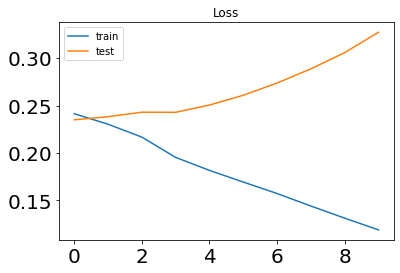

In [ ]:
plt.title('Loss')
plt.plot(model.history['loss'], label='train')
plt.plot(model.history['val_loss'], label='test')
plt.legend()
plt.show();

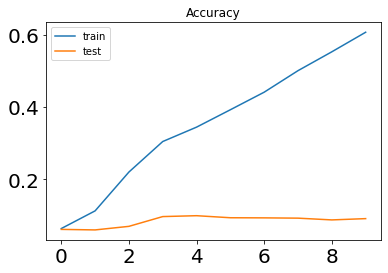

In [ ]:
plt.title('Accuracy')
plt.plot(model.history['accuracy'], label='train')
plt.plot(model.history['val_accuracy'], label='test')
plt.legend()
plt.show();

Based on the above diagrams, we can tell that LSTM does not apply well to this problem, it has a very low accuracy.

In addition to this, I also added another dedicated LSTM notebook a month after the completion of this Notebook, but its results were still very poor.

So the LSTM part of this Notebook and the dedicated LSTM notebook corroborate each other to prove the LSTM is not suitable for this problem.